<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# **Forecasting of Breast Cancer on medical measurement**
# Lab 2. Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>How to transform months to years?</h3>


<h3>Import data</h3>
<p>
You can find the "Breast Cancer Dataset" from the following link: <a href="https://www.kaggle.com/datasets/gunesevitan/breast-cancer-metabric">https://www.kaggle.com/datasets/gunesevitan/breast-cancer-metabric</a>.
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4>

Now, let's import libraries that we will use

In [2]:
# conda install -c anaconda scikit-learn

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, recall_score
from sklearn import preprocessing

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


In [4]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0XQ4EN/breast_cancer.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address.


In [5]:
df = pd.read_csv(filename)

Let's read the data in df2 and drop all the rows that have no data

In [6]:
df2=df.dropna().reset_index(drop=True)
df2.head(10)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
1,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
2,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
3,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Negative,Yes,36.09,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
4,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,...,Deceased,Negative,No,35.79,Recurred,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease
5,MB-0036,85.49,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumA,1.0,Positve,...,Deceased,Positive,Yes,123.32,Recurred,Female,ER+/HER2- Low Prolif,22.0,4.0,Died of Disease
6,MB-0060,45.43,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,139.01,Not Recurred,Female,ER+/HER2- High Prolif,23.0,2.0,Living
7,MB-0066,61.49,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumB,1.0,Positve,...,Living,Positive,Yes,155.36,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Living
8,MB-0100,68.68,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,Yes,Basal,1.0,Negative,...,Deceased,Negative,Yes,7.83,Recurred,Female,ER-/HER2-,39.0,2.0,Died of Disease
9,MB-0101,46.89,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,Moderate,No,Normal,1.0,Positve,...,Living,Positive,Yes,33.72,Recurred,Female,ER+/HER2- Low Prolif,34.0,2.0,Living


Now let's write in the dictionary <b>col</b> the columns in which we will generate empty fields.

In [7]:
cols = {'Age at Diagnosis': df2[['Age at Diagnosis']], 'Primary Tumor Laterality': df2[['Primary Tumor Laterality']],
        'Nottingham prognostic index': df2[['Nottingham prognostic index']], 'Overall Survival (Months)': df2[['Overall Survival (Months)']], "Patient's Vital Status": df2[["Patient's Vital Status"]]}

col = {'Age at Diagnosis': 0.07, 'Primary Tumor Laterality': 0.1, 'Nottingham prognostic index': 0.05, 'Overall Survival (Months)': 0.03, "Patient's Vital Status": 0.01}
for c in col:
    m = np.random.rand(len(df2))
    mask = m < col[c]
    df2.loc[mask, c] = np.NaN


Use the method <b>head()</b> to display the first five rows of the dataframe.


In [8]:
# To see what the data set looks like, we'll use the head() method.
df2.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
1,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
2,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
3,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Negative,Yes,36.09,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
4,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,...,Deceased,Negative,No,35.79,Recurred,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease


As we can see, several NaN appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [9]:
missing_data = df2.isnull()
missing_data.head(5)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Patient ID
False    1092
Name: Patient ID, dtype: int64

Age at Diagnosis
False    1007
True       85
Name: Age at Diagnosis, dtype: int64

Type of Breast Surgery
False    1092
Name: Type of Breast Surgery, dtype: int64

Cancer Type
False    1092
Name: Cancer Type, dtype: int64

Cancer Type Detailed
False    1092
Name: Cancer Type Detailed, dtype: int64

Cellularity
False    1092
Name: Cellularity, dtype: int64

Chemotherapy
False    1092
Name: Chemotherapy, dtype: int64

Pam50 + Claudin-low subtype
False    1092
Name: Pam50 + Claudin-low subtype, dtype: int64

Cohort
False    1092
Name: Cohort, dtype: int64

ER status measured by IHC
False    1092
Name: ER status measured by IHC, dtype: int64

ER Status
False    1092
Name: ER Status, dtype: int64

Neoplasm Histologic Grade
False    1092
Name: Neoplasm Histologic Grade, dtype: int64

HER2 status measured by SNP6
False    1092
Name: HER2 status measured by SNP6, dtype: int64

HER2 Status
False    1092
Name: HER2 Status, dtype: int64

Tu

Based on the summary above, each column contains more than 1000 rows of data and six of the columns containing missing data:

<ol>
    <li>"Age at Diagnosis"</li>
    <li>"Primary Tumor Laterality"</li>
    <li>"Nottingham prognostic index"</li>
    <li>"Overall Survival (Months)"</li>
    <li>"Patient's Vital Status"</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"Age at Diagnosis": replace them with mean</li>
    <li>"Nottingham prognostic index": replace them with mean</li>
    <li>"Overall Survival (Months)": replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"Primary Tumor Laterality": replace them with "Left".
        <ul>
            <li>Reason: More than half of the data is "Left". Since "Left" is the most common, this is the most likely</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"Patient's Vital Status": simply delete the whole row
    </li>
</ul>


<h4>Calculate the mean value for the "Age at Diagnosis" column </h4>


In [11]:
avg_age_loss = df2["Age at Diagnosis"].astype("float").mean(axis=0)
print("Age at Diagnosis:", round(avg_age_loss, 2))

Age at Diagnosis: 60.24


<h4>Replace "NaN" with mean value in "Age at Diagnosis" column</h4>


In [12]:
df2["Age at Diagnosis"].replace(np.nan, avg_age_loss, inplace=True)

<h4>Let's calculate the error between the replaced data and the original data</h4>

In [13]:
mape_age = mean_absolute_percentage_error(cols['Age at Diagnosis'], df2['Age at Diagnosis'])
print('Error of Age at Diagnosis: ', round(mape_age, 2) * 100, '%')

Error of Age at Diagnosis:  1.0 %


<h4>Calculate the mean value for the "Nottingham prognostic index" column</h4>


In [14]:
avg_nottingham=df2['Nottingham prognostic index'].astype('float').mean(axis=0)
print("Nottingham prognostic index:", round(avg_nottingham, 2))

Nottingham prognostic index: 4.12


<h4>Replace "NaN" with the mean value in the "Nottingham prognostic index" column</h4>


In [15]:
df2["Nottingham prognostic index"].replace(np.nan, avg_nottingham, inplace=True)

<h4>Let's calculate the error between the replaced data and the original data</h4>

In [16]:
mape_nottingham = mean_absolute_percentage_error(cols['Nottingham prognostic index'], df2['Nottingham prognostic index'])
print('Error of Nottingham prognostic index: ', round(mape_nottingham, 2) * 100, '%')

Error of Nottingham prognostic index:  1.0 %


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "Overall Survival (Months)" column with the mean value and calculate the error.</b>

</div>


In [17]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
#Calculate the mean value for "stroke" column
avg_survival = df2['Overall Survival (Months)'].astype('float').mean(axis=0)
print("Overall Survival (Months):", avg_survival)

# replace NaN by mean value in "stroke" column
df2['Overall Survival (Months)'].replace(np.nan, avg_survival, inplace=True)

#Let's calculate the error between the replaced data and the original data
mape_survival = mean_absolute_percentage_error(cols['Overall Survival (Months)'], df2['Overall Survival (Months)'])
print('Error of Overall Survival (Months): ', round(mape_survival, 2) * 100, '%')
```

</details>


To see which values are present in a particular column, we can use the ".value_counts()" method:


In [18]:
df2['Primary Tumor Laterality'].value_counts()

Left     505
Right    478
Name: Primary Tumor Laterality, dtype: int64

We can see that "Left" is the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [19]:
df2['Primary Tumor Laterality'].value_counts().idxmax()

'Left'

The replacement procedure is very similar to what we have seen previously:


In [20]:
#replace the missing 'Primary Tumor Laterality' values by the most frequent
df2["Primary Tumor Laterality"].replace(np.nan, "Left", inplace=True)

<h4>Let's calculate the error between the replaced data and the original data</h4>

In [21]:
confusion_matrix(cols['Primary Tumor Laterality'], df2[['Primary Tumor Laterality']])

mape_primary = recall_score(cols['Primary Tumor Laterality'], df2[['Primary Tumor Laterality']], average='macro')
print('Error of Primary Tumor Laterality: ', round(1 - mape_primary, 2) * 100, '%')

Error of Primary Tumor Laterality:  5.0 %


Finally, let's drop all rows that do not have Patient's Vital Status data:


In [22]:
# simply drop whole row with NaN in "Patient's Vital Status" column
df2.dropna(subset=["Patient's Vital Status"], axis=0, inplace=True)

# reset index, because we droped two rows
df2.reset_index(drop=True, inplace=True)

In [23]:
df2.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
1,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
2,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
3,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Negative,Yes,36.09,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
4,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,...,Deceased,Negative,No,35.79,Recurred,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease


We can notice that the errors we calculated are insignificant which is acceptable. So we can go back to our original <b>df</b> data and replace the empty values.

Let's create two arrays in which we will write the names of the columns in which we will replace empty values. Data from the first array will be replaced by the mean. Data from the second array are replaced by the most frequent.


In [24]:
col_mean = ["Age at Diagnosis", "Nottingham prognostic index", "Overall Survival (Months)",
            "Relapse Free Status (Months)", "Tumor Size", ]
col_freq = ["Type of Breast Surgery", "Cellularity", "Chemotherapy", "Pam50 + Claudin-low subtype", "Cohort",
            "ER status measured by IHC", "ER Status", "Neoplasm Histologic Grade", "HER2 status measured by SNP6", "HER2 Status", "Tumor Other Histologic Subtype", "Hormone Therapy", "Inferred Menopausal State", "Integrative Cluster", "Primary Tumor Laterality", "Lymph nodes examined positive", "Mutation Count", "Oncotree Code", "Overall Survival Status", "PR Status", "Radio Therapy", "Relapse Free Status", "3-Gene classifier subtype", "Tumor Stage", "Patient's Vital Status"]

Calculate the mean values for the <b>col_mean</b> array and replace them.

In [25]:
#Calculate the mean values for "col_mean" array

for c in col_mean:
    avg_c = df[c].astype('float').mean(axis=0)
    print(c, ":", round(avg_c, 2))
    df[c].replace(np.nan, avg_c, inplace=True)


Age at Diagnosis : 60.42
Nottingham prognostic index : 4.03
Overall Survival (Months) : 125.24
Relapse Free Status (Months) : 108.84
Tumor Size : 26.22


Let's determine the most common that value in the array using the ".idxmax()" and replace them.

In [26]:
#replace the missing values for "col_freq" array by the most frequent

for c in col_freq:
    max_value = df[c].value_counts().idxmax()
    #replace the missing values by the most frequent
    df[c].replace(np.nan, max_value, inplace=True)

df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,ER+/HER2- Low Prolif,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,ER+/HER2- Low Prolif,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [27]:
df.dtypes

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'Cohort' and 'Neoplasm Histologic Grade' they are shown as type 'float', although they must be of type 'int'. We have to convert data types into a proper format for each column using the "astype()" method.</p>


<h4>Convert data types to proper format</h4>


In [28]:
col_int = ["Cohort", "Neoplasm Histologic Grade","Lymph nodes examined positive", "Mutation Count", "Tumor Stage"]

col_cat = list(df.select_dtypes(include=['object']).columns)
#exceprt column "Patient ID"
col_cat = col_cat[1:]

col_bool = ["Chemotherapy", "Hormone Therapy", "Radio Therapy"]

df[col_int] = df[col_int].astype("int")
df[col_cat] = df[col_cat].astype("category")
for c in col_bool:
    df[c] = df[c].map({'Yes': True, 'No': False})

df[col_bool] = df[col_bool].astype("bool")

<h4>Let us list the columns after the conversion</h4>


In [29]:
df.dtypes

Patient ID                          object
Age at Diagnosis                   float64
Type of Breast Surgery            category
Cancer Type                       category
Cancer Type Detailed              category
Cellularity                       category
Chemotherapy                          bool
Pam50 + Claudin-low subtype       category
Cohort                               int32
ER status measured by IHC         category
ER Status                         category
Neoplasm Histologic Grade            int32
HER2 status measured by SNP6      category
HER2 Status                       category
Tumor Other Histologic Subtype    category
Hormone Therapy                       bool
Inferred Menopausal State         category
Integrative Cluster               category
Primary Tumor Laterality          category
Lymph nodes examined positive        int32
Mutation Count                       int32
Nottingham prognostic index        float64
Oncotree Code                     category
Overall Sur

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform months to years:</p>
<p>In our dataset, there are two columns in which the values are presented in months.</p>
<p>We will need to apply <b>data transformation</b> to transform months to years.</p>


<p>We can do many mathematical operations directly in Pandas.</p>


In [30]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,claudin-low,1,Positve,...,Living,Negative,True,138.65,Not Recurred,Female,ER-/HER2-,22.0,2,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,LumA,1,Positve,...,Living,Positive,True,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,True,LumB,1,Positve,...,Deceased,Positive,False,151.28,Recurred,Female,ER+/HER2- Low Prolif,15.0,2,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,True,LumB,1,Positve,...,Living,Positive,True,162.76,Not Recurred,Female,ER+/HER2- Low Prolif,25.0,2,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,True,LumB,1,Positve,...,Deceased,Positive,True,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2,Died of Disease


In [31]:
# Convert months to years by mathematical operation (Divide months by 12)
df['Overall Survival (Years)'] = df["Overall Survival (Months)"]/12

df = df.drop(columns='Overall Survival (Months)')

# check your transformed data
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status,Overall Survival (Years)
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,claudin-low,1,Positve,...,Negative,True,138.65,Not Recurred,Female,ER-/HER2-,22.0,2,Living,11.708333
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,LumA,1,Positve,...,Positive,True,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1,Living,7.052778
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,True,LumB,1,Positve,...,Positive,False,151.28,Recurred,Female,ER+/HER2- Low Prolif,15.0,2,Died of Disease,13.641667
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,True,LumB,1,Positve,...,Positive,True,162.76,Not Recurred,Female,ER+/HER2- Low Prolif,25.0,2,Living,13.744444
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,True,LumB,1,Positve,...,Positive,True,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2,Died of Disease,3.447222


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform months to years in the column of "Relapse Free Status (Years)".</b>

</div>


In [32]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# Convert months to years by mathematical operation (Divide months by 12)
df["Relapse Free Status (Years)"] = df["Relapse Free Status (Months)"]/12

# check your transformed data
df.head()

```

</details>


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the column "Tumor Size".</p>
<p><b>Target:</b> would like to normalize this variable so their value ranges from 0 to 1</p>


In [33]:
# replace (original value) by MinMaxScaler values

scaler = preprocessing.MinMaxScaler()
df['Tumor Size']  = scaler.fit_transform(df[['Tumor Size']])

# show the scaled column
df[["Tumor Size"]].head()

,Tumor Size
0,0.116022
1,0.049724
2,0.077348
3,0.132597
4,0.215470


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the task above, normalize the data by another method. Replace original value by (original value)/(maximum value)</b>

</div>


In [34]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
df['Tumor Size'] = df['Tumor Size']/df['Tumor Size'].max()

# show the scaled column
df[["Tumor Size"]].head()


```

</details>


Here we can see we've normalized column "Tumor Size" in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "Nottingham prognostic index" is a real valued variable ranging from 1 to 7. What if we only care about the difference between patients with high index, medium index, and little index (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'Nottingham prognostic index' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Convert data to correct format:


In [35]:
df["Nottingham prognostic index"]=df["Nottingham prognostic index"].astype(int, copy=True)

Let's plot the histogram of Nottingham prognostic index to see what the distribution of Nottingham prognostic index looks like.



Text(0.5, 1.0, 'Nottingham prognostic index bins')

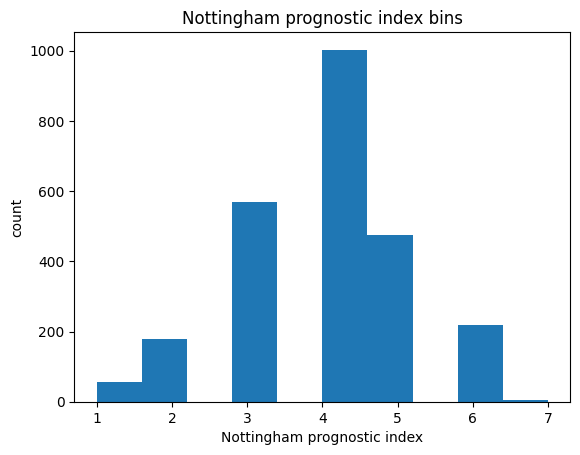

In [36]:
plt.pyplot.hist(df["Nottingham prognostic index"])

# set x/y labels and plot title
plt.pyplot.xlabel("Nottingham prognostic index")
plt.pyplot.ylabel("count")
plt.pyplot.title("Nottingham prognostic index bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of Nottingham prognostic index, we want to set start_value = min(df["Nottingham prognostic index"]).</p>
<p>Since we want to include the maximum value of Nottingham prognostic index, we want to set end_value = max(df["Nottingham prognostic index"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [37]:
bins = np.linspace(min(df["Nottingham prognostic index"]), max(df["Nottingham prognostic index"]), 4)
bins

array([1., 3., 5., 7.])

We set group  names:


In [38]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['Nottingham prognostic index']` belongs to.


In [39]:
df['Nottingham prognostic index-binned'] = pd.cut(df['Nottingham prognostic index'], bins, labels=group_names, include_lowest=True )
df[['Nottingham prognostic index','Nottingham prognostic index-binned']].head(20)

,Nottingham prognostic index,Nottingham prognostic index-binned
0,6,High
1,4,Medium
2,4,Medium
3,4,Medium
4,6,High
5,4,Medium
6,4,Medium
7,6,High
8,4,Medium
9,6,High


Let's see the number of patients in each bin:


In [40]:
df["Nottingham prognostic index-binned"].value_counts()

Medium    1478
Low        805
High       226
Name: Nottingham prognostic index-binned, dtype: int64

Let's plot the distribution of each bin:



Text(0.5, 1.0, 'Nottingham prognostic index bins')

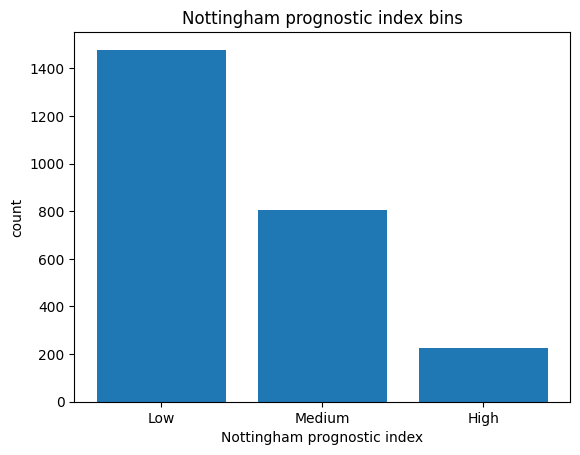

In [41]:
pyplot.bar(group_names, df["Nottingham prognostic index-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Nottingham prognostic index")
plt.pyplot.ylabel("count")
plt.pyplot.title("Nottingham prognostic index bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "Nottingham prognostic index" based on 3 categories ("Low", "Medium" and "High").
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 




Text(0.5, 1.0, 'Nottingham prognostic index bins')

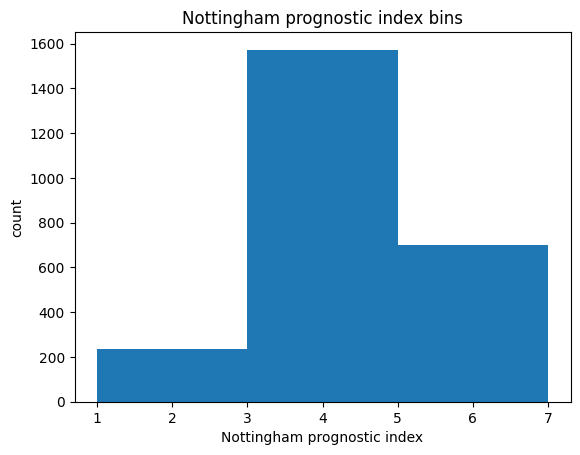

In [42]:
# draw histogram of attribute "Nottingham prognostic index" with bins = 3
plt.pyplot.hist(df["Nottingham prognostic index"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Nottingham prognostic index")
plt.pyplot.ylabel("count")
plt.pyplot.title("Nottingham prognostic index bins")

The plot above shows the binning result for the attribute "Nottingham prognostic index".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "Inferred Menopausal State" has two unique values: "Post" or "Pre". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "Inferred Menopausal State" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [43]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival Status', 'PR Status', 'Radio Therapy',
       'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status', 'Overall Survival (Years)',
       'Nottingham prognostic index-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [44]:
dummy_variable_1 = pd.get_dummies(df["Inferred Menopausal State"])
dummy_variable_1.head()

,Post,Pre
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


Change the column names for clarity:


In [45]:
dummy_variable_1.rename(columns={'Post':'Inferred Menopausal State-Post',
                                 'Pre':'Inferred Menopausal State-Pre'}, inplace=True)
dummy_variable_1.head()

,Inferred Menopausal State-Post,Inferred Menopausal State-Pre
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In the dataframe, column 'Inferred Menopausal State' has values for 'Post' and 'Pre' as 0s and 1s now.


In [46]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Inferred Menopausal State" from "df"
df.drop("Inferred Menopausal State", axis = 1, inplace=True)

In [47]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status,Overall Survival (Years),Nottingham prognostic index-binned,Inferred Menopausal State-Post,Inferred Menopausal State-Pre
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,claudin-low,1,Positve,...,Not Recurred,Female,ER-/HER2-,0.116022,2,Living,11.708333,High,1,0
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,False,LumA,1,Positve,...,Not Recurred,Female,ER+/HER2- High Prolif,0.049724,1,Living,7.052778,Medium,0,1
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,True,LumB,1,Positve,...,Recurred,Female,ER+/HER2- Low Prolif,0.077348,2,Died of Disease,13.641667,Medium,0,1
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,True,LumB,1,Positve,...,Not Recurred,Female,ER+/HER2- Low Prolif,0.132597,2,Living,13.744444,Medium,0,1
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,True,LumB,1,Positve,...,Recurred,Female,ER+/HER2- High Prolif,0.215470,2,Died of Disease,3.447222,High,1,0


The last two columns are now the indicator variable representation of the Inferred Menopausal State variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "Relapse Free Status"</b>

</div>


In [48]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['Relapse Free Status'])

# change column names for clarity
dummy_variable_2.rename(columns={'Recurred':'Relapse Free Status-Recurred', 'Not Recurred': 'Relapse Free Status-Not Recurred'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()
```

</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.</b>

</div>


In [49]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('Relapse Free Status', axis = 1, inplace=True)
```

</details>


In [50]:
df.to_csv('breast_cancer_clean')

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### Thank you for completing this lab!

## Author

<a href="https://author.skills.network/instructors/dmytro_shliakhovskyi">Dmytro Shliakhovskyi</a>

### Other Contributors

<a href="https://author.skills.network/instructors/yaroslav_vyklyuk_2">Prof. Yaroslav Vyklyuk, DrSc, PhD</a>

<a href="https://author.skills.network/instructors/nataliya_boyko">Ass. Prof. Nataliya Boyko, PhD</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                         |
| ----------------- | ------- | ---------- | ---------------------------------------------------------- |
|    2023-03-04     | 01 | Dmytro Shliakhovkyi | Lab created |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
